In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
loan = pd.read_csv(r'C:\Users\ppawa\Pranav\Study\Engineering\SEM 5\ML\Lab\ML-Labs\Loan Approval.csv')  
loan['Loan_Status'] = loan['Loan_Status'].map({'Y': 1, 'N': 0})
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


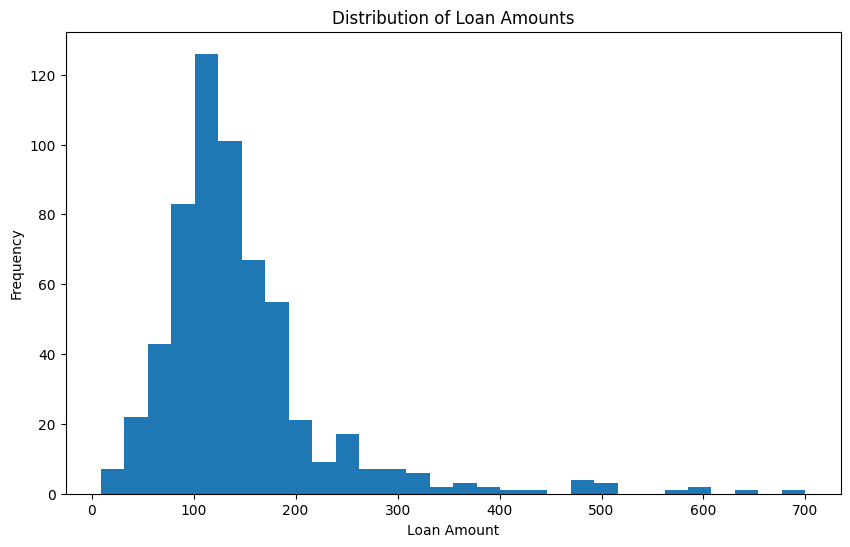

In [10]:
# Plot 1: Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
plt.hist(loan['LoanAmount'].dropna(), bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

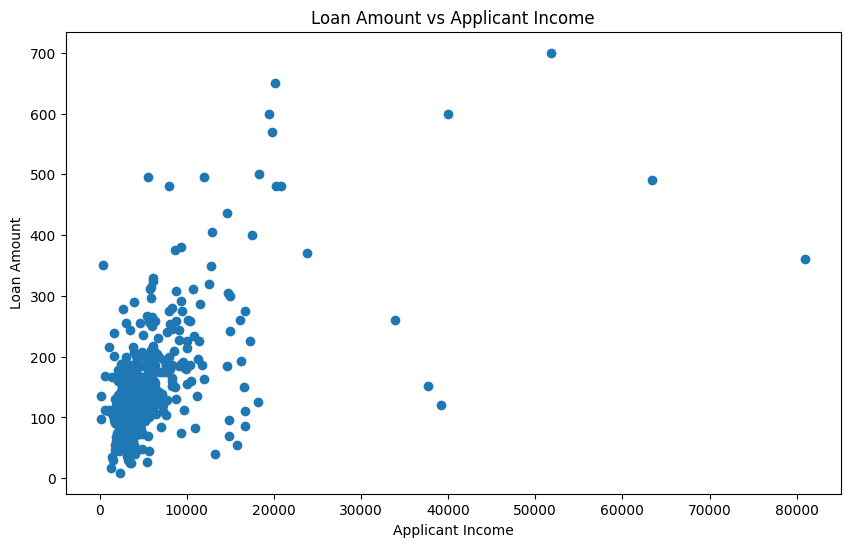

In [11]:
# Plot 2: Loan Amount vs Applicant Income
plt.figure(figsize=(10, 6))
plt.scatter(loan['ApplicantIncome'], loan['LoanAmount'])
plt.title('Loan Amount vs Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

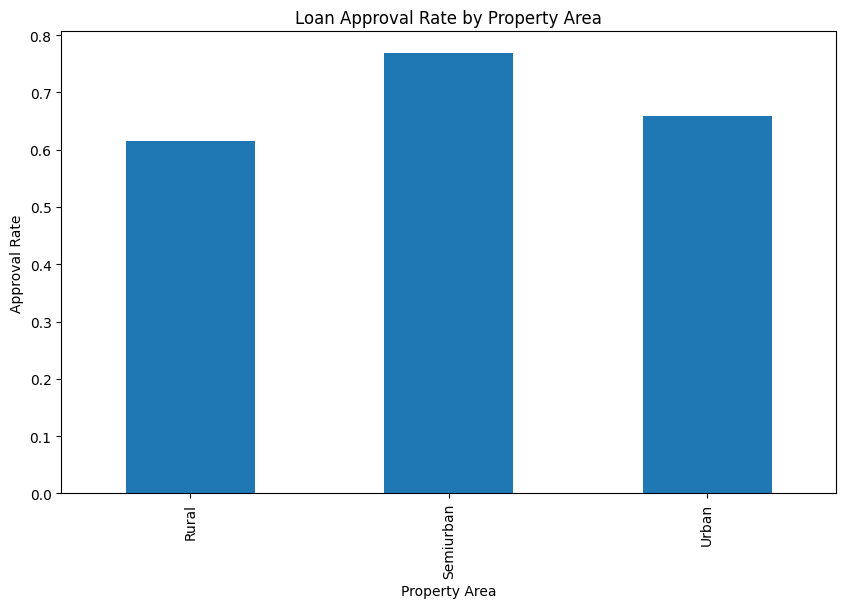

In [12]:
# Plot 3: Loan Approval Rate by Property Area
approval_rate = loan.groupby('Property_Area')['Loan_Status'].mean()
plt.figure(figsize=(10, 6))
approval_rate.plot(kind='bar')
plt.title('Loan Approval Rate by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Approval Rate')
plt.show()

In [6]:
X = loan[['ApplicantIncome']]  
y = loan['Loan_Status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

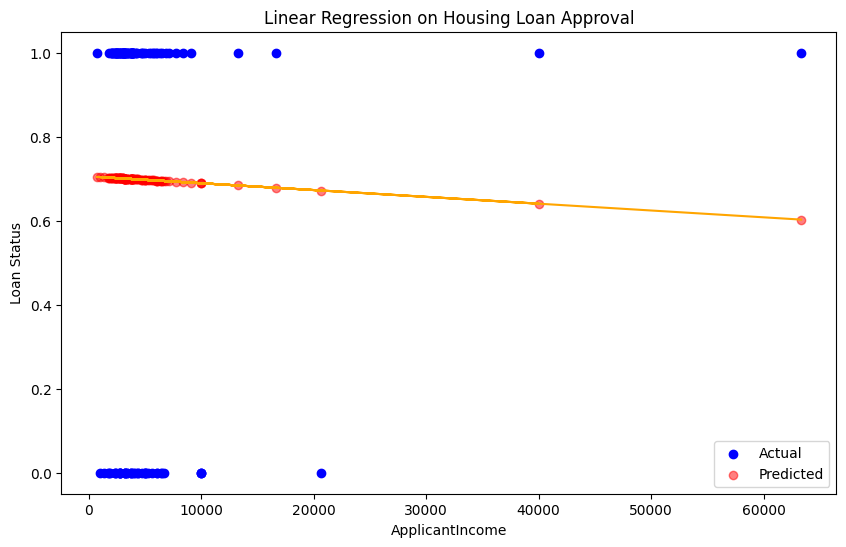

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.plot(X_test, y_pred, color='orange')
plt.title('Linear Regression on Housing Loan Approval')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan Status')
plt.legend()
plt.show()

In [9]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.23016368529685888
